# Order Delivery Time Prediction By Paras Mehta

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [583]:
# Import essential libraries for data manipulation and analysis
import pandas as pd            
import numpy as np            
import matplotlib.pyplot as plt  
import seaborn as sns  

from sklearn.model_selection import train_test_split

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [585]:
# Importing the file porter_data_1.csv
df = pd.read_csv('porter_data_1.csv')
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

market_id                   0
created_at                  0
actual_delivery_time        0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_dashers       0
total_busy_dashers          0
total_outstanding_orders    0
distance                    0
dtype: int64

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [587]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  
0                      21.0     34.44  
1                       2.0     27.60  
2                      18.0     11.56  
3                       8.0     31.80  
4                       7.0      8.20

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [589]:
# Convert categorical features to category type
df['market_id'] = df['market_id'].astype('category')
df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [591]:
# Calculate time taken in minutes
time_diff = df['actual_delivery_time'] - df['created_at']
df['delivery_time_min'] = time_diff.dt.total_seconds() / 60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [593]:
# Extract the hour and day of week from the 'created_at' timestamp
df['order_hour'] =df['created_at'].dt.hour
df['order_dayofweek'] =df['created_at'].dt.dayofweek
df_bak = df


# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['order_dayofweek'].apply(lambda x: 1 if x>= 5 else 0)
df['isWeekend'] = df['isWeekend'].astype('category')


In [595]:
# Drop unnecessary columns
df = df.drop(['created_at', 'actual_delivery_time'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  category
 1   store_primary_category    175777 non-null  category
 2   order_protocol            175777 non-null  category
 3   total_items               175777 non-null  int64   
 4   subtotal                  175777 non-null  int64   
 5   num_distinct_items        175777 non-null  int64   
 6   min_item_price            175777 non-null  int64   
 7   max_item_price            175777 non-null  int64   
 8   total_onshift_dashers     175777 non-null  float64 
 9   total_busy_dashers        175777 non-null  float64 
 10  total_outstanding_orders  175777 non-null  float64 
 11  distance                  175777 non-null  float64 
 12  delivery_time_min         175777 non-null  float64 
 13  order_hour                175

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [597]:
# Define target variable (y) and features (X)

y = df['delivery_time_min']
X = df.drop(['delivery_time_min'], axis=1)

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [599]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=100)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [601]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categeorial_cols = X_train.select_dtypes(include=['category']).columns.tolist()
print(f"Numerical columns is {numerical_cols}")
print(f"Categorial columns is {categeorial_cols}")

                                         


Numerical columns is ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'order_dayofweek']
Categorial columns is ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

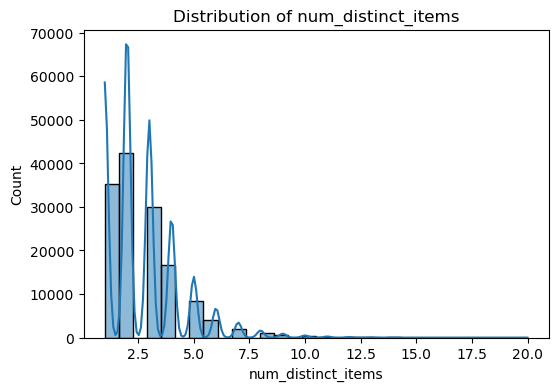

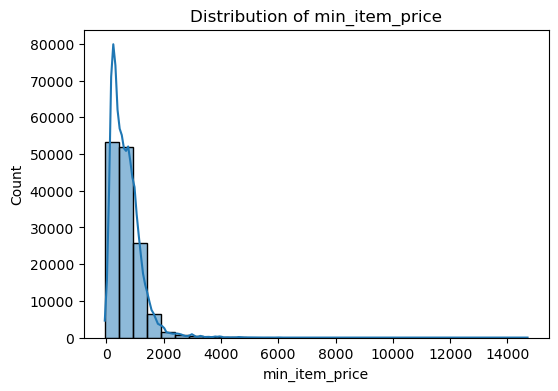

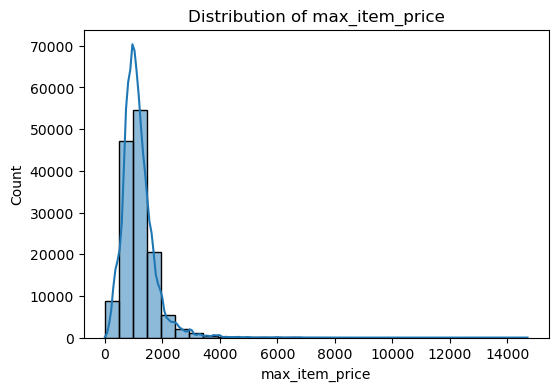

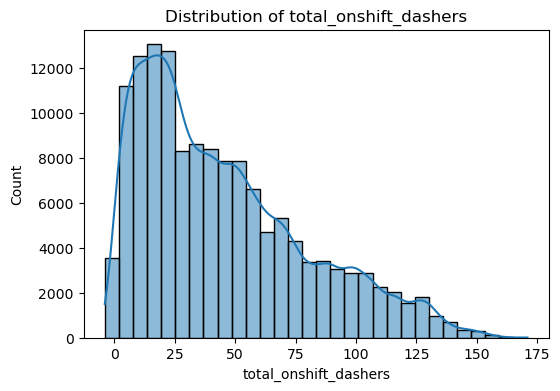

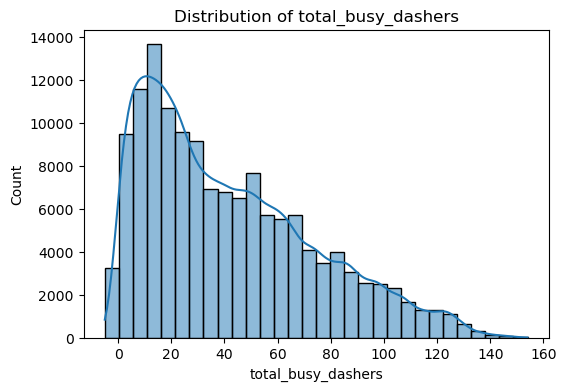

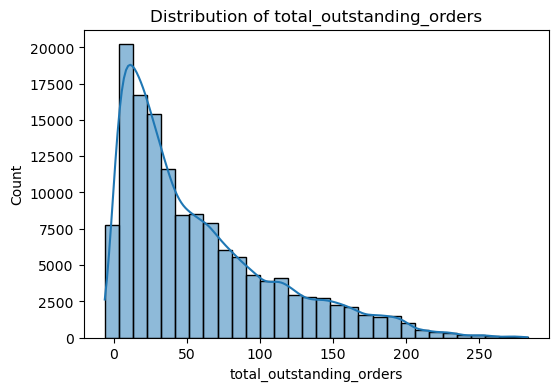

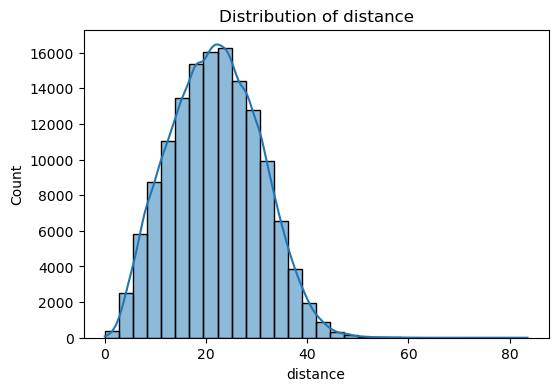

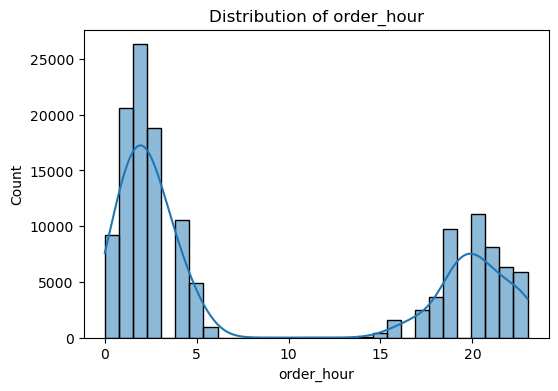

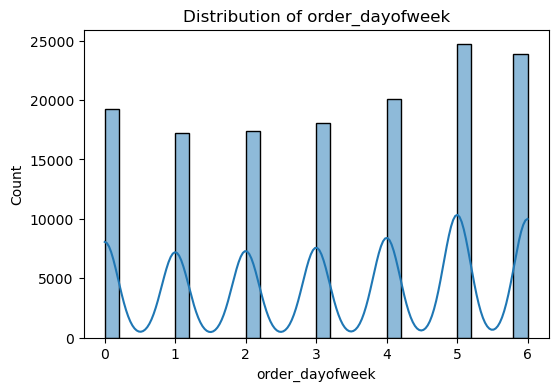

In [603]:
# Plot distributions for all numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(X_train[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()



##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

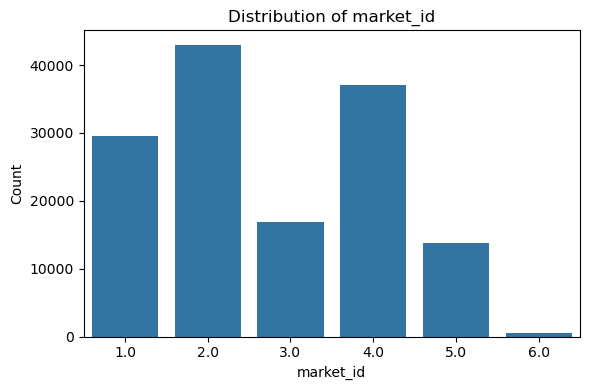

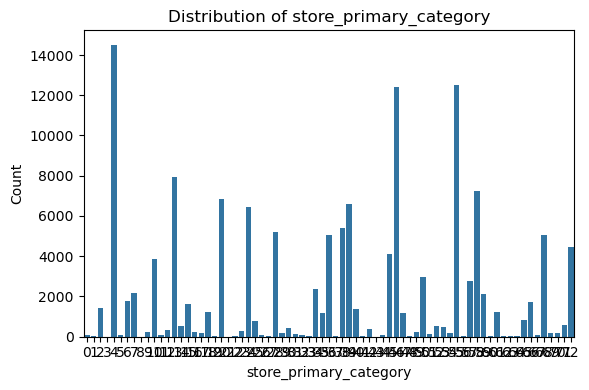

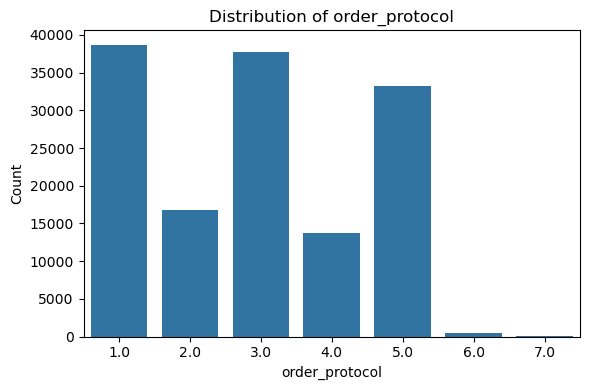

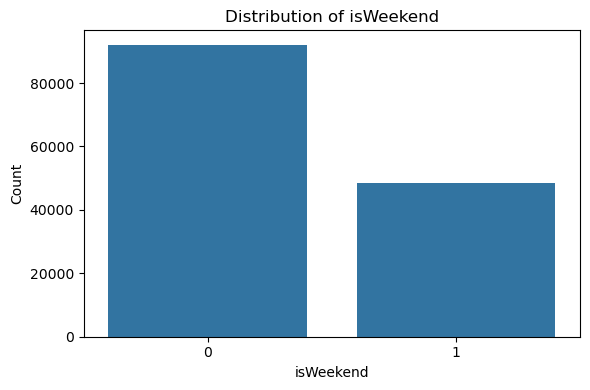

In [605]:
# Distribution of categorical columns

for col in categeorial_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=X_train[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

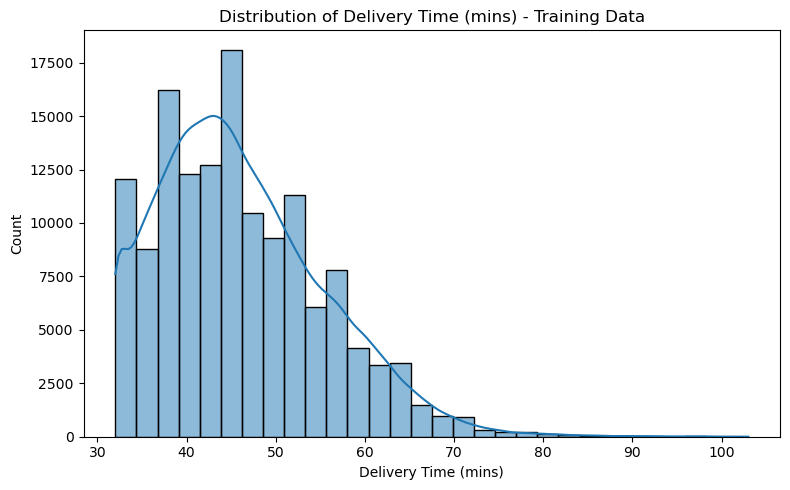

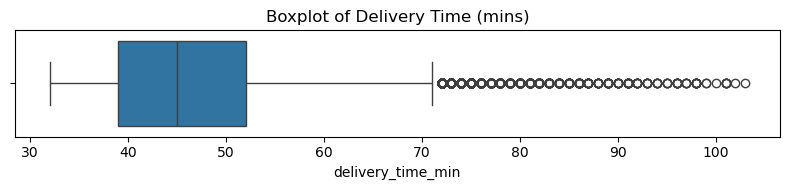

In [607]:
# Distribution of time_taken
plt.figure(figsize=(8, 5))
sns.histplot(y_train, bins=30, kde=True)
plt.title("Distribution of Delivery Time (mins) - Training Data")
plt.xlabel("Delivery Time (mins)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 2))
sns.boxplot(x=y_train)
plt.title("Boxplot of Delivery Time (mins)")
plt.tight_layout()
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

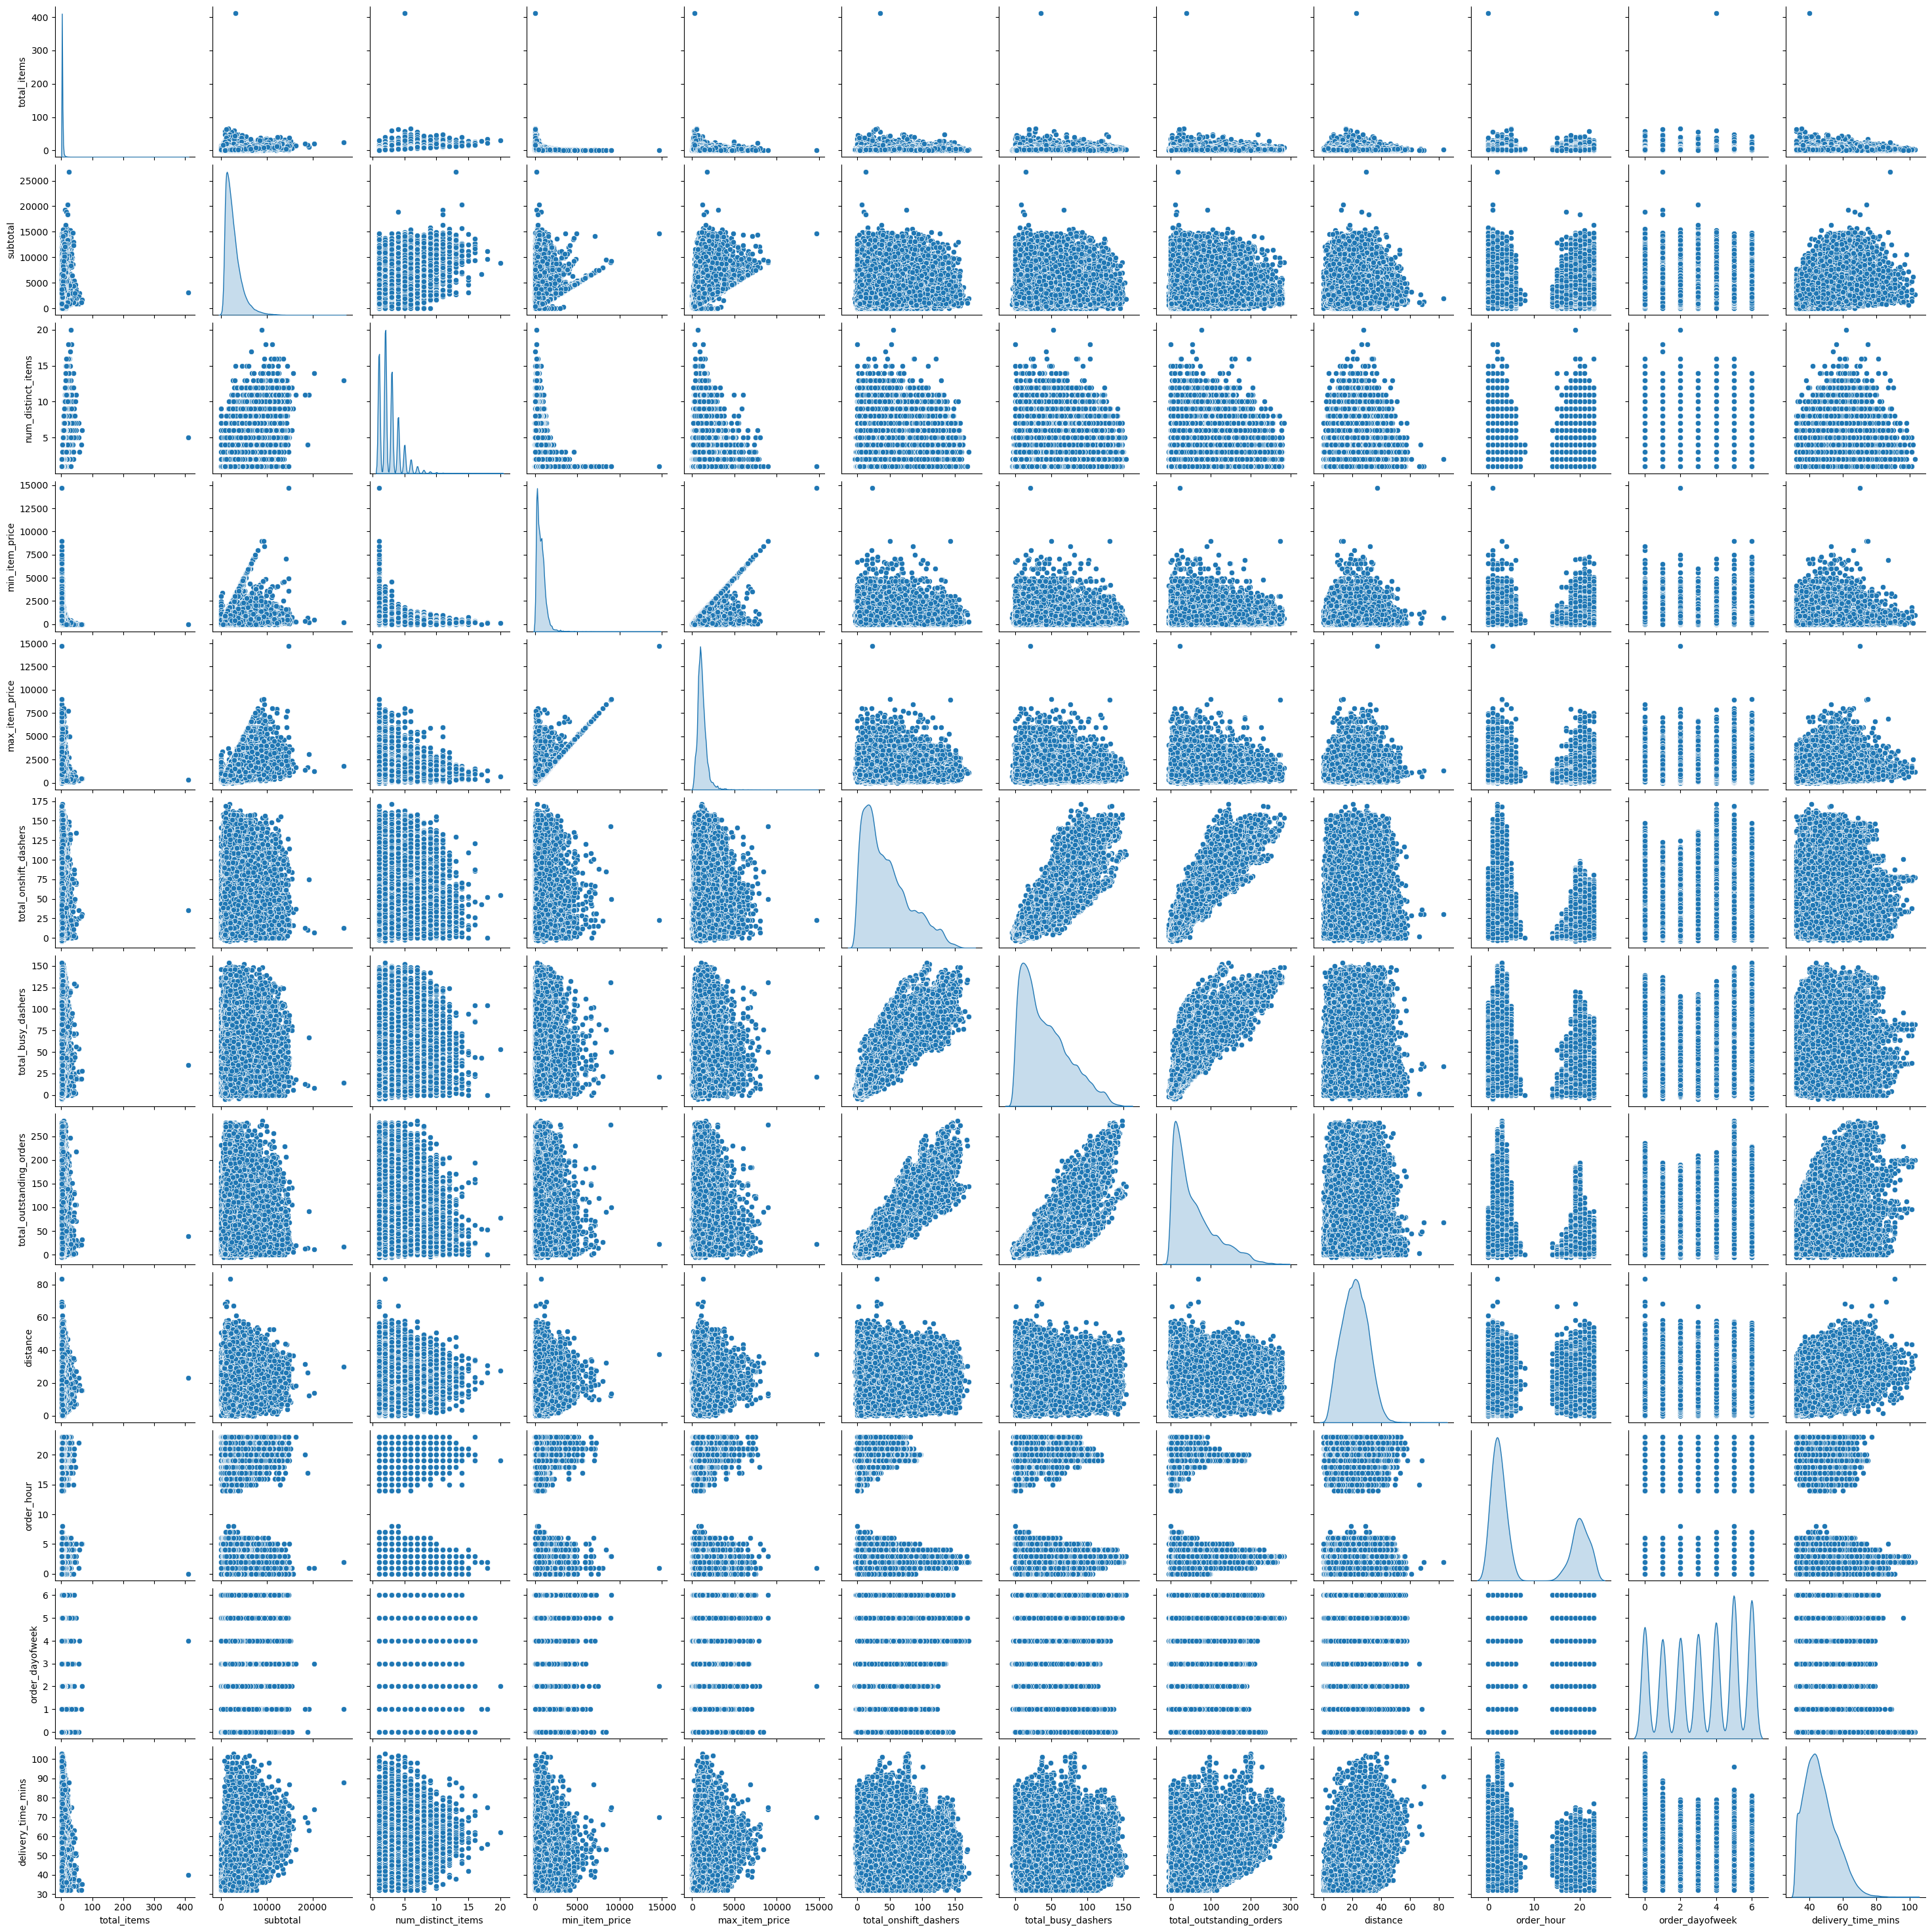

In [609]:
# Scatter plot to visualise the relationship between time_taken and other features

train_data = X_train.copy()
train_data['delivery_time_mins'] = y_train
sns.pairplot(train_data, diag_kind='kde')

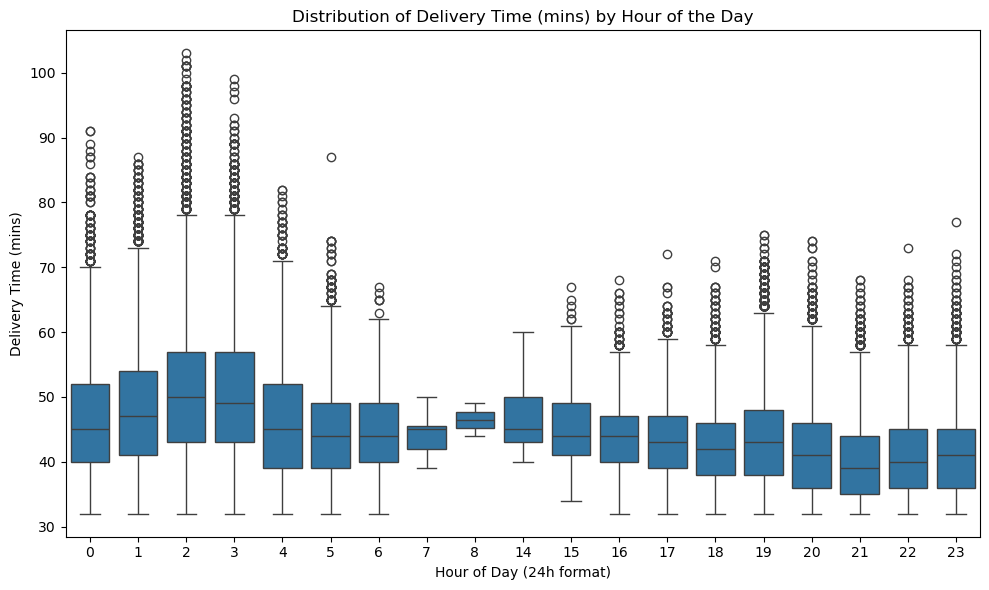

In [611]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['order_hour'], y=y_train)
plt.title("Distribution of Delivery Time (mins) by Hour of the Day")
plt.xlabel("Hour of Day (24h format)")
plt.ylabel("Delivery Time (mins)")
plt.tight_layout()
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

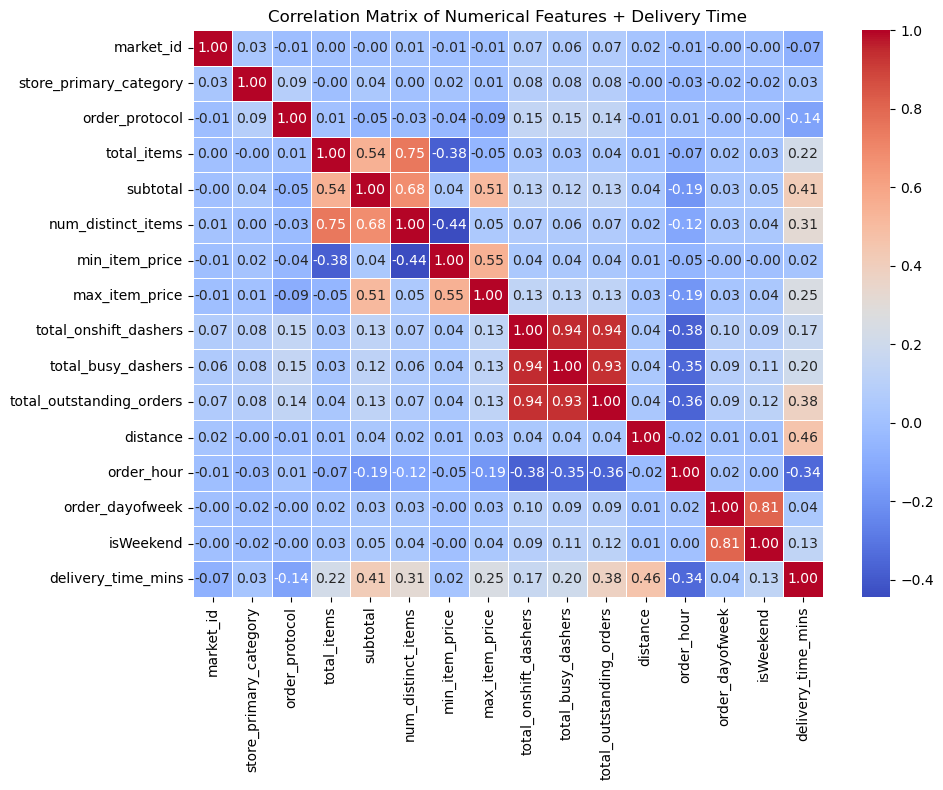

In [613]:
# Plot the heatmap of the correlation matrix

corr = train_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features + Delivery Time")
plt.tight_layout()
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [615]:
# Drop 3-5 weakly correlated columns from training dataset

train_data = train_data.drop(columns=['market_id','store_primary_category','order_dayofweek','min_item_price'], axis=1)
X_train_new = X_train.drop(columns=['market_id','store_primary_category','order_dayofweek','min_item_price'], axis=1)



#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

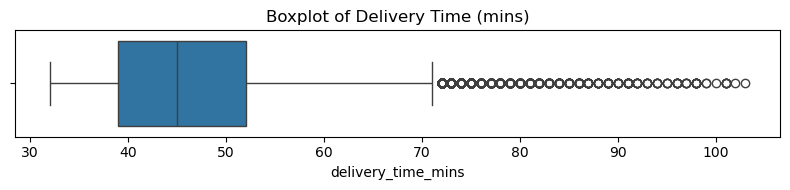

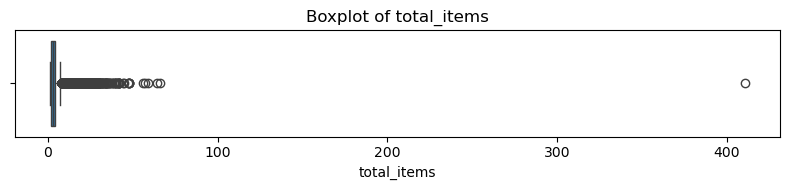

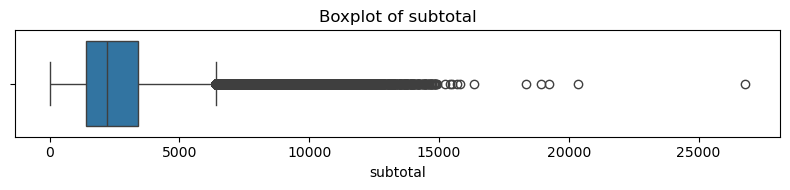

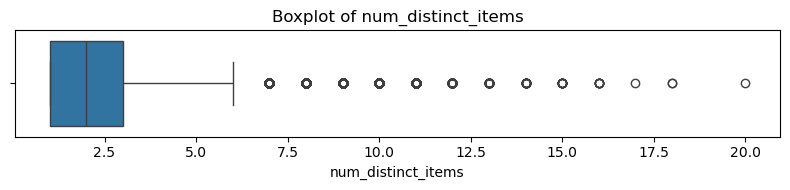

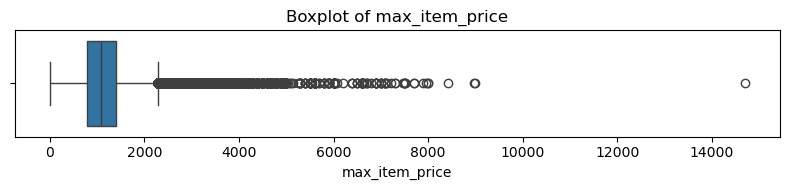

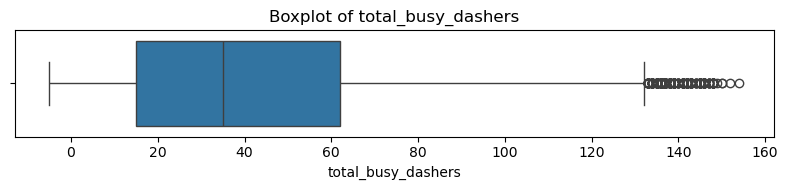

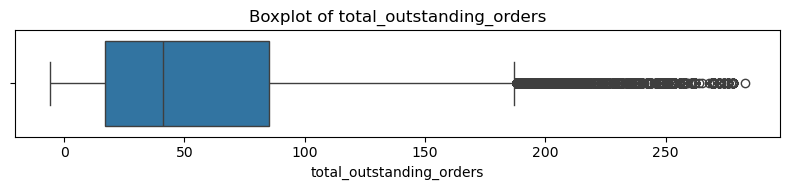

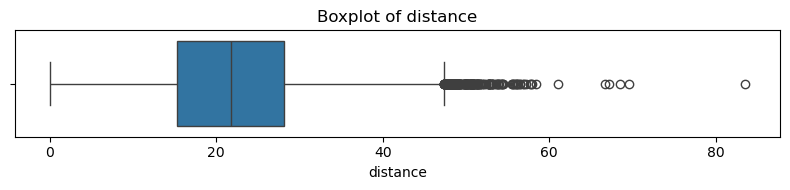

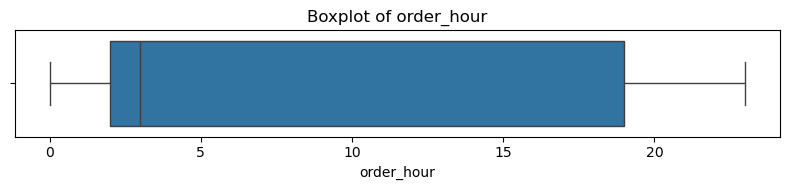

In [617]:
# Boxplot for time_taken
train_data = X_train_new.copy()
train_data['delivery_time_mins'] = y_train

# Plot boxplot for target
plt.figure(figsize=(8, 2))
sns.boxplot(x=train_data['delivery_time_mins'])
plt.title("Boxplot of Delivery Time (mins)")
plt.tight_layout()
plt.show()
numerical_cols = X_train_new.select_dtypes(include=np.number).columns.tolist()
for col in numerical_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=train_data[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

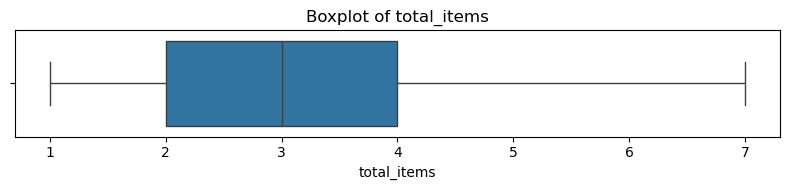

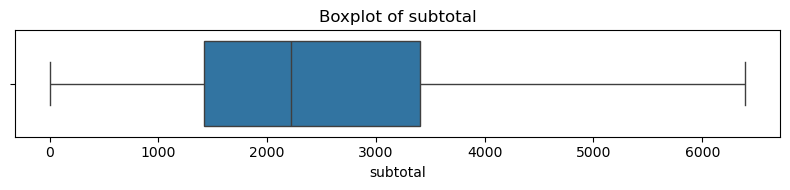

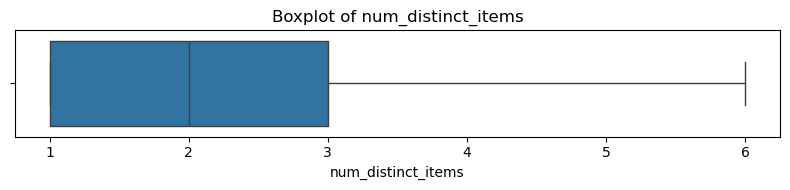

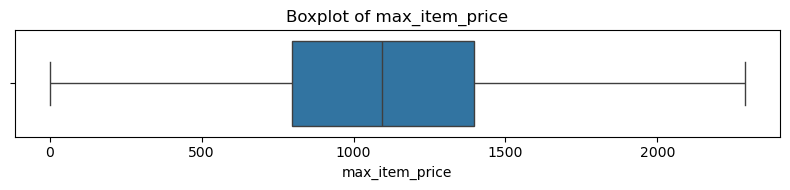

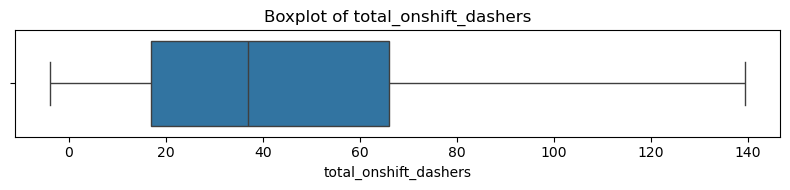

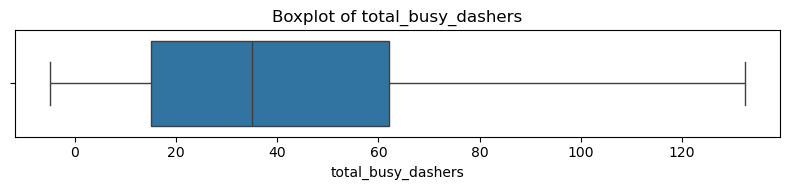

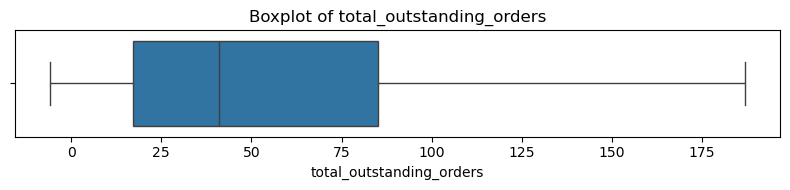

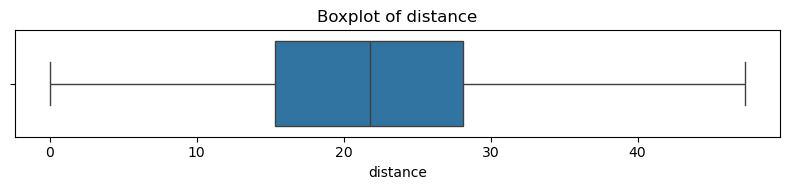

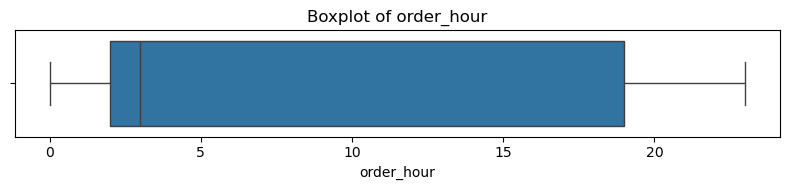

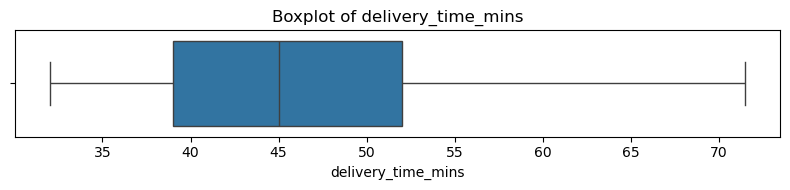

In [619]:
# Handle outliers
numerical_cols = train_data.select_dtypes(include=np.number).columns.tolist()
for col in numerical_cols:
    Q1 = train_data[col].quantile(0.25)
    Q3 = train_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap values
    train_data[col] = train_data[col].clip(lower=lower_bound, upper=upper_bound)

for col in numerical_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=train_data[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

y_train = train_data["delivery_time_mins"]
X_train = train_data
X_train = X_train.drop(columns="delivery_time_mins", axis=1)

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [621]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_cols = X_test.select_dtypes(include=np.number).columns.tolist()
categeorial_cols = X_test.select_dtypes(include=['category']).columns.tolist()
print(f"Numerical columns is {numerical_cols}")
print(f"Categorial columns is {categeorial_cols}")

Numerical columns is ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'order_dayofweek']
Categorial columns is ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

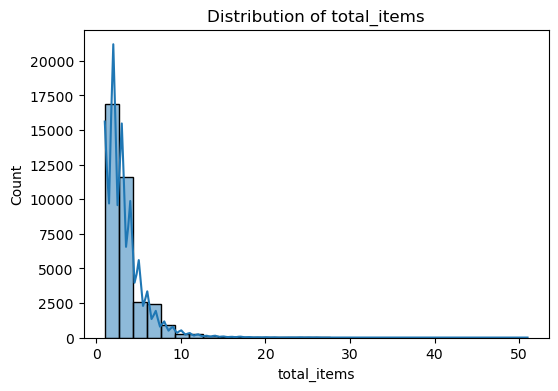

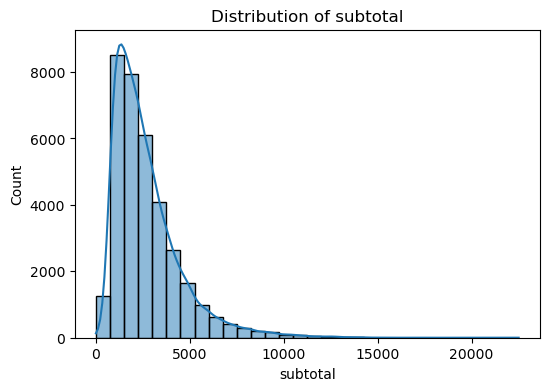

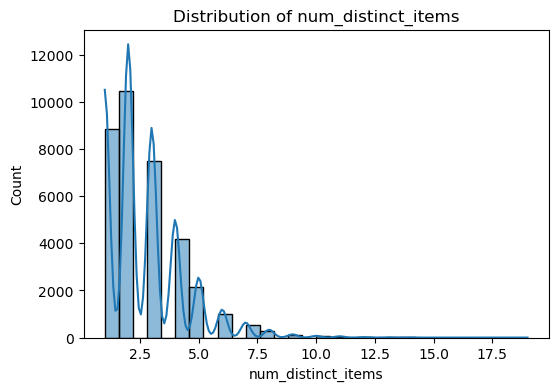

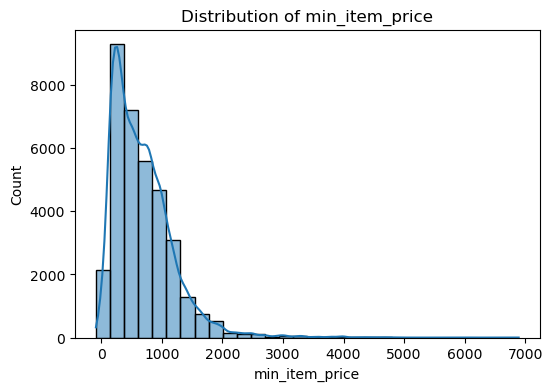

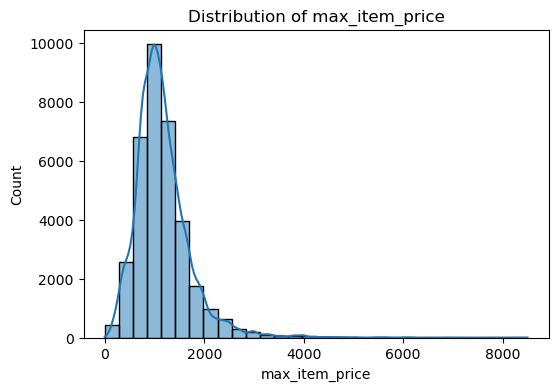

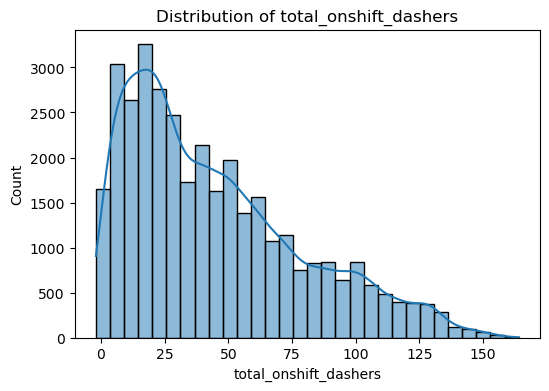

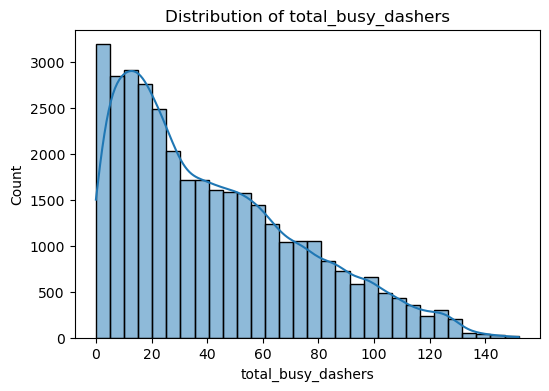

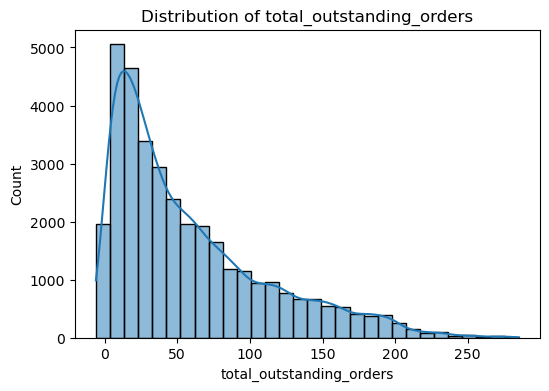

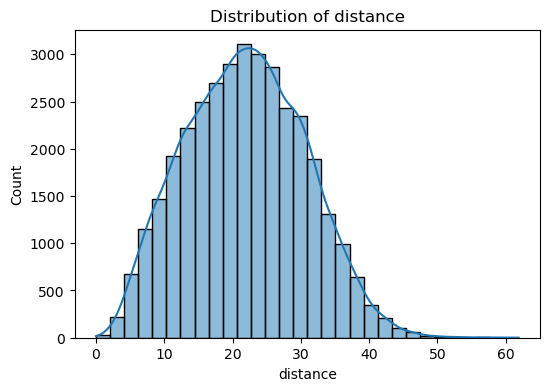

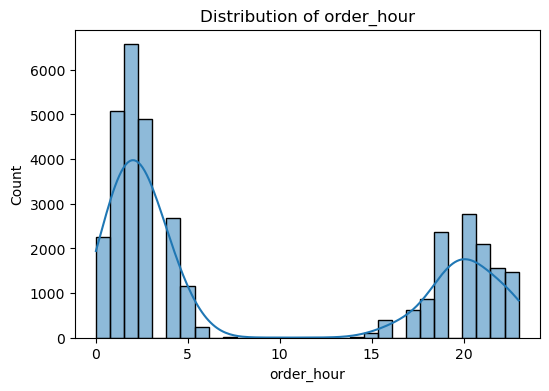

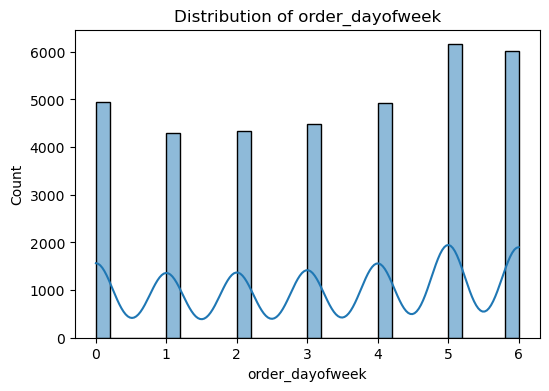

In [623]:
# Plot distributions for all numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(X_test[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


##### **4.1.2**
Check the distribution of categorical features

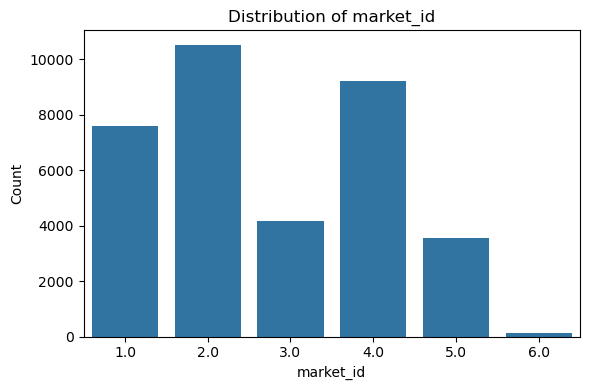

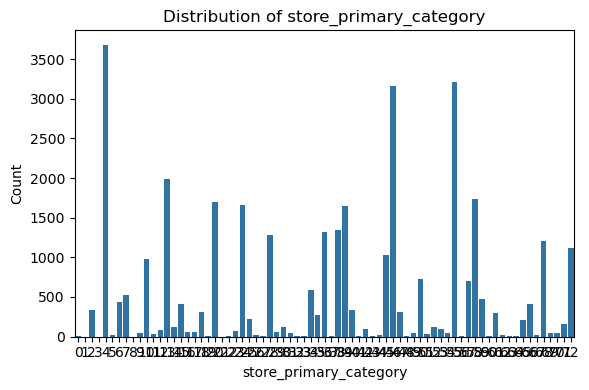

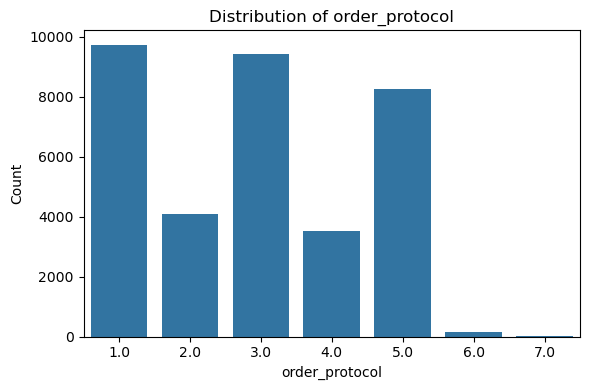

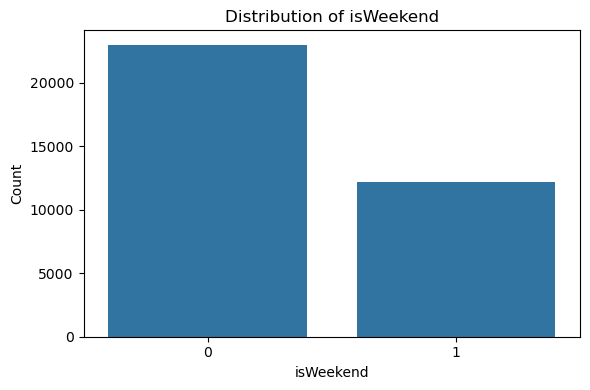

In [625]:
# Distribution of categorical columns
for col in categeorial_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=X_test[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

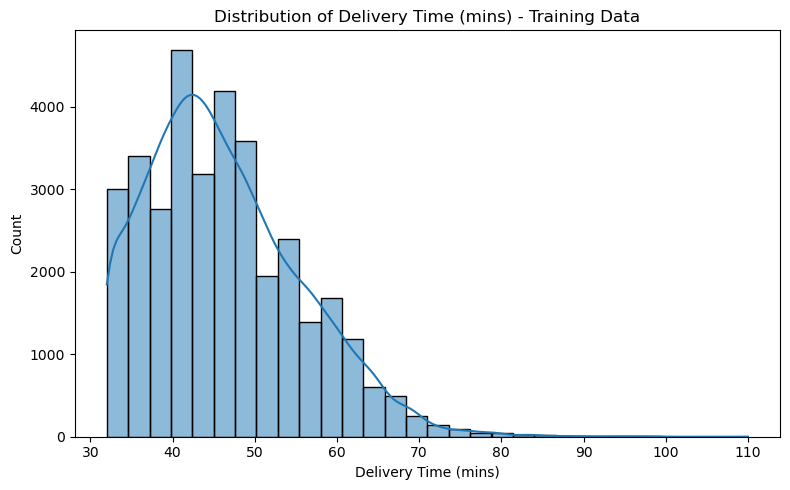

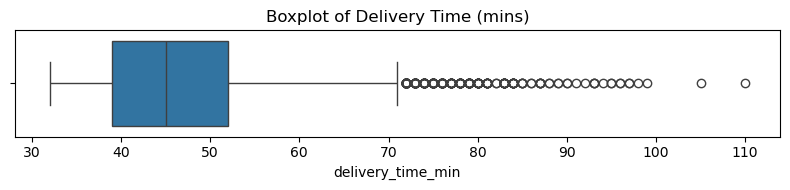

In [627]:
# Distribution of time_taken
plt.figure(figsize=(8, 5))
sns.histplot(y_test, bins=30, kde=True)
plt.title("Distribution of Delivery Time (mins) - Training Data")
plt.xlabel("Delivery Time (mins)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 2))
sns.boxplot(x=y_test)
plt.title("Boxplot of Delivery Time (mins)")
plt.tight_layout()
plt.show()


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

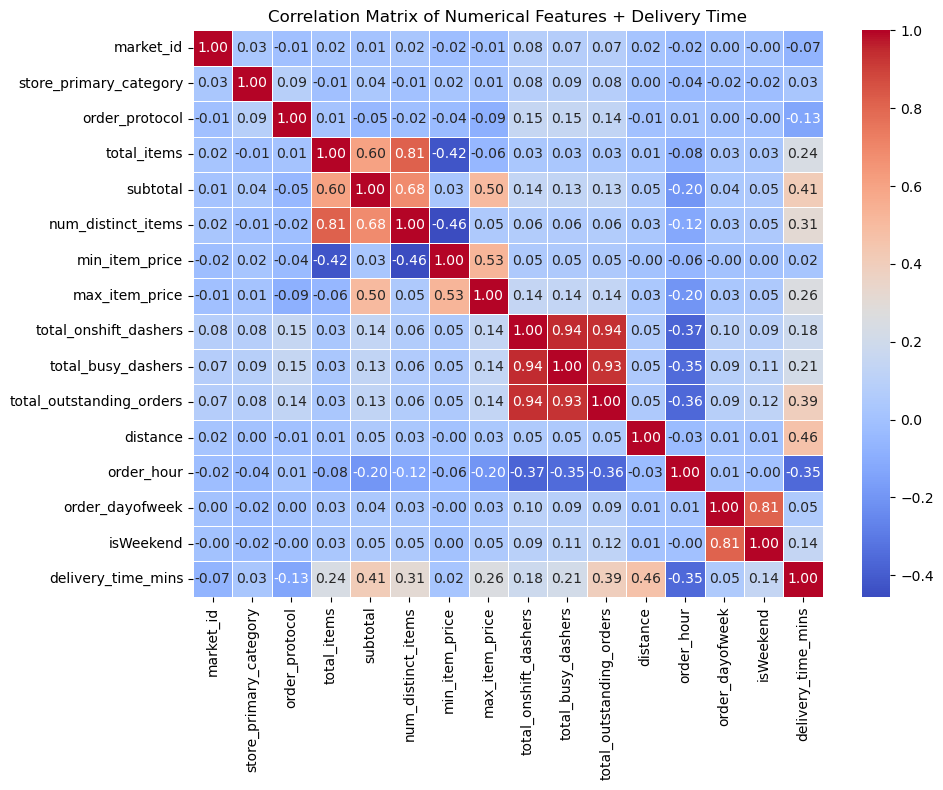

In [629]:
# Scatter plot to visualise the relationship between time_taken and other features
test_data = X_test.copy()
test_data['delivery_time_mins'] = y_test
corr = test_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features + Delivery Time")
plt.tight_layout()
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [631]:
# Drop the weakly correlated columns from training dataset

test_data = test_data.drop(columns=['market_id','store_primary_category','order_dayofweek','min_item_price'], axis=1)
X_test = X_test.drop(columns=['market_id','store_primary_category','order_dayofweek','min_item_price'], axis=1)


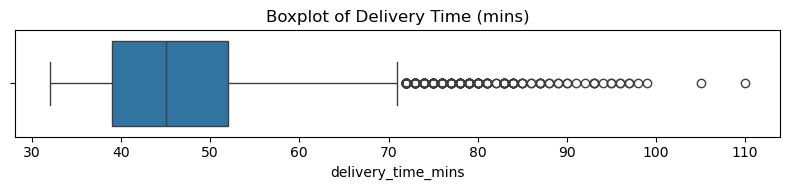

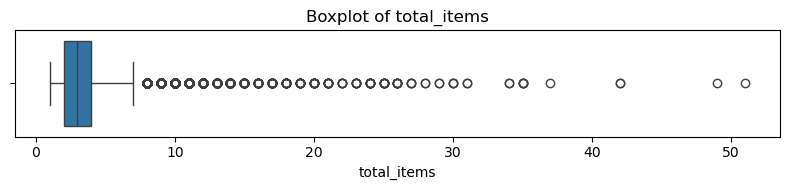

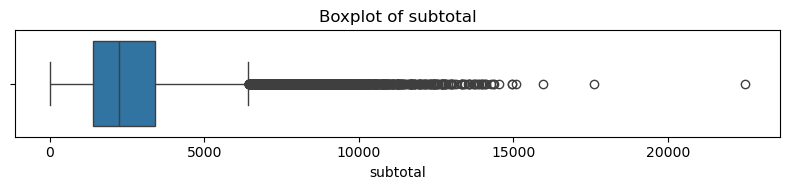

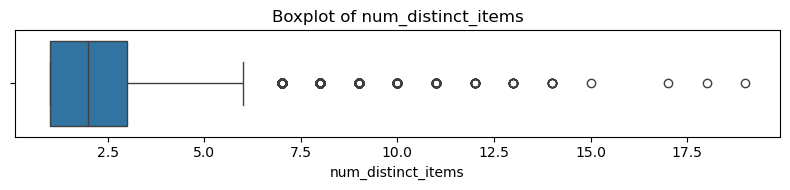

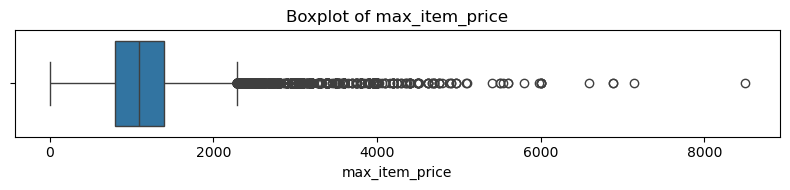

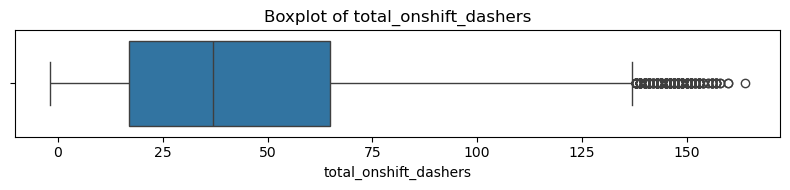

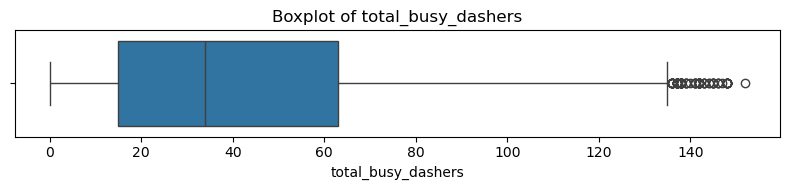

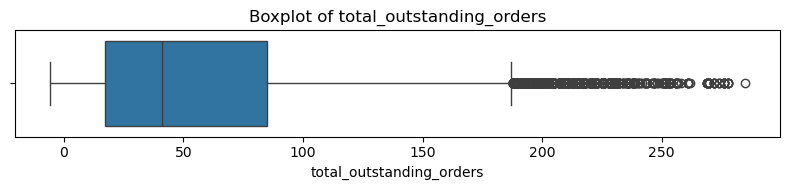

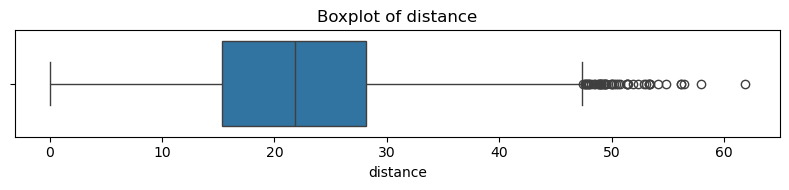

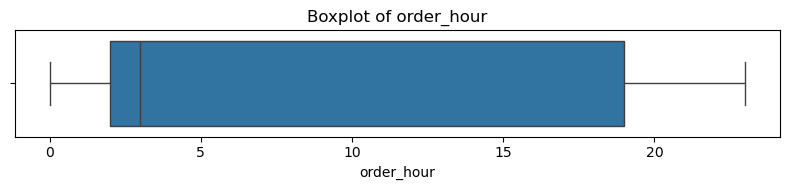

In [633]:
# Boxplot for time_taken
test_data = X_test.copy()
test_data['delivery_time_mins'] = y_test

# Plot boxplot for target
plt.figure(figsize=(8, 2))
sns.boxplot(x=test_data['delivery_time_mins'])
plt.title("Boxplot of Delivery Time (mins)")
plt.tight_layout()
plt.show()
numerical_cols = X_test.select_dtypes(include=np.number).columns.tolist()
for col in numerical_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=test_data[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

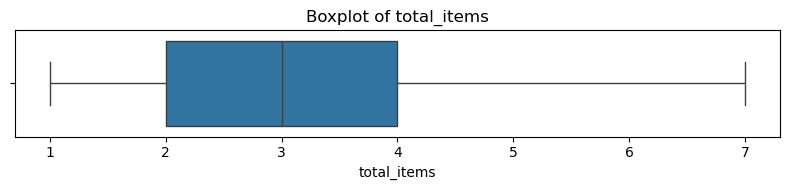

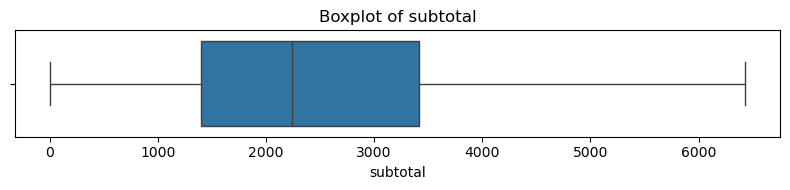

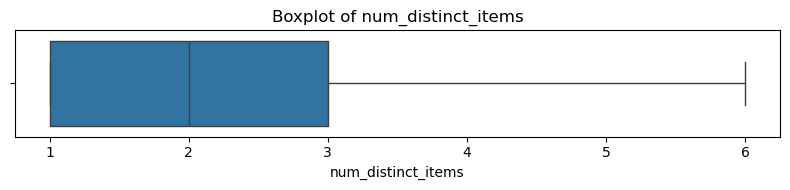

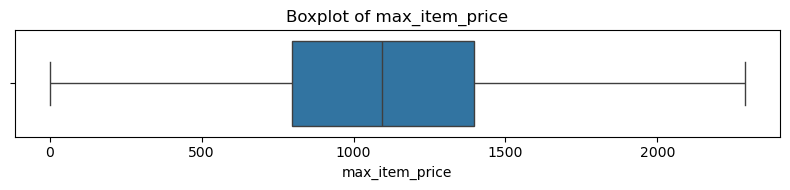

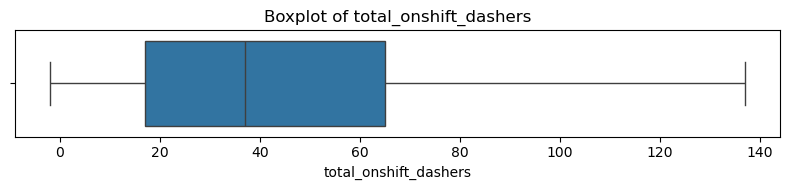

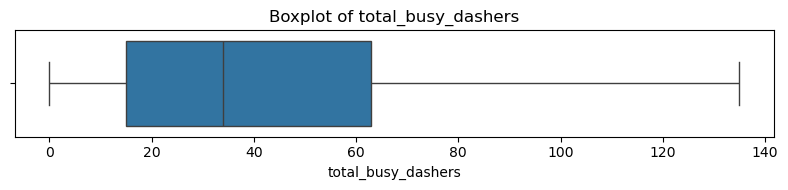

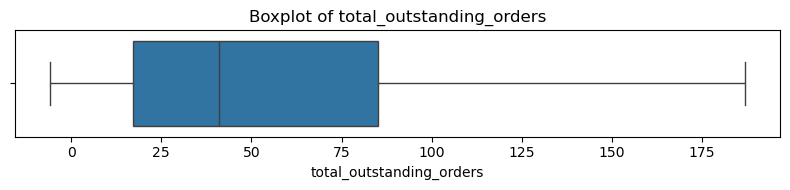

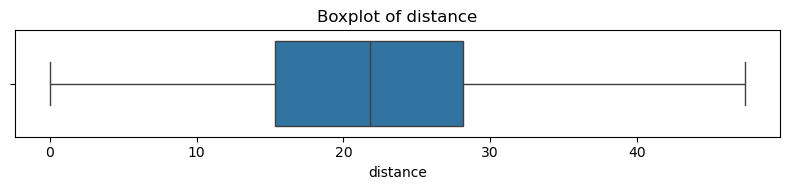

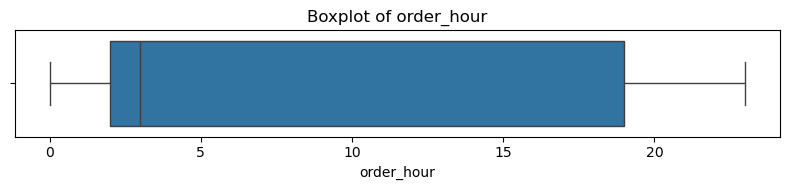

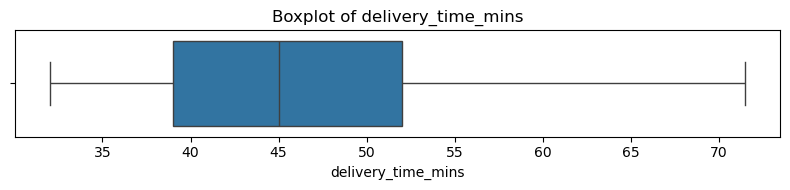

In [634]:
#Handle outlier in test data
# Handle outliers
numerical_cols = test_data.select_dtypes(include=np.number).columns.tolist()
for col in numerical_cols:
    Q1 = test_data[col].quantile(0.25)
    Q3 = test_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap values
    test_data[col] = test_data[col].clip(lower=lower_bound, upper=upper_bound)

for col in numerical_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=test_data[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

y_test = test_data["delivery_time_mins"]
X_test = test_data
X_test = X_test.drop(columns="delivery_time_mins", axis=1)

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [637]:
# Import libraries
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [639]:
# Apply scaling to the numerical columns
scaler = MinMaxScaler()
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_train.head()

order_protocol  total_items  subtotal  num_distinct_items  \
42111             2.0     0.000000  0.211102                 0.0   
58452             5.0     0.666667  0.670055                 0.8   
20644             2.0     0.833333  1.000000                 0.4   
79735             2.0     0.333333  0.572322                 0.4   
167933            5.0     0.666667  1.000000                 0.8   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
42111         0.589777               0.188153            0.181818   
58452         0.393185               0.808362            0.763636   
20644         0.633464               0.585366            0.610909   
79735         0.633464               0.912892            0.807273   
167933        1.000000               0.334495            0.356364   

        total_outstanding_orders  distance  order_hour isWeekend  
42111                   0.129534  0.202874    0.869565         0  
58452                   1.000000  0.730347    0.086957         1  
20644                   0.626943  0.737954    0.130435         0  
79735                   0.927461  0.544379    0.086957         1  
167933                  0.347150  0.374472    0.086957         0

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [641]:
# Create/Initialise the model
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)

In [643]:
# Train the model using the training data
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     delivery_time_mins   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                 7.753e+04
Date:                Sat, 28 Jun 2025   Prob (F-statistic):               0.00
Time:                        02:51:46   Log-Likelihood:            -3.7290e+05
No. Observations:              140621   AIC:                         7.458e+05
Df Residuals:                  140609   BIC:                         7.459e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       35.6944      0.046    780.391      0.000      35.605      35.784
order_protocol              -0.6787      0.006   -109.832      0.000      -0.691      -0.667
total_items                 -0.2448      0.083     -2.935      0.003      -0.408      -0.081
subtotal                     9.5931      0.082    117.288      0.000       9.433       9.753
num_distinct_items           2.5841      0.076     34.222      0.000       2.436       2.732
max_item_price               1.1835      0.072     16.354      0.000       1.042       1.325
total_onshift_dashers      -52.6689      0.134   -392.687      0.000     -52.932     -52.406
total_busy_dashers         -18.7195      0.133   -140.359      0.000     -18.981     -18.458
total_outstanding_orders    68.8530      0.114    605.303      0.000      68.630      69.076
distance                    22.2378      0.050    447.744      0.000      22.140      22.335
order_hour                  -5.4515      0.027   -203.340      0.000      -5.504      -5.399
isWeekend                    1.6151      0.019     83.093      0.000       1.577       1.653
==============================================================================
Omnibus:                    43876.107   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           151954.476
Skew:                           1.570   Prob(JB):                         0.00
Kurtosis:                       7.009   Cond. No.                         64.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [645]:
# Make predictions
X_test.info()
X_test[numerical_cols] = scaler.fit_transform(X_test[numerical_cols])
X_test_sm = sm.add_constant(X_test)
y_pred = lr_model.predict(X_test_sm)


<class 'pandas.core.frame.DataFrame'>
Index: 35156 entries, 139667 to 98870
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   order_protocol            35156 non-null  category
 1   total_items               35156 non-null  int64   
 2   subtotal                  35156 non-null  float64 
 3   num_distinct_items        35156 non-null  int64   
 4   max_item_price            35156 non-null  int64   
 5   total_onshift_dashers     35156 non-null  float64 
 6   total_busy_dashers        35156 non-null  float64 
 7   total_outstanding_orders  35156 non-null  float64 
 8   distance                  35156 non-null  float64 
 9   order_hour                35156 non-null  int32   
 10  isWeekend                 35156 non-null  category
dtypes: category(2), float64(5), int32(1), int64(3)
memory usage: 2.6 MB


In [647]:
# Find results for evaluation metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f" Test RMSE: {rmse} minutes")
print(f" Test MAE: {mae} minutes")
print(f" Test R²: {r2}")

 Test RMSE: 3.5301474701503337 minutes
 Test MAE: 2.7400491397966746 minutes
 Test R²: 0.8511437126723511


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [649]:
# Loop through the number of features and test the model

linreg = LinearRegression()
observe = []
for features in range(1,len(X_train.columns) + 1) :
    #print(features)
    rfe = RFE(linreg,n_features_to_select= features)
    rfe.fit(X_train, y_train)
    rfe_sel_col = X_train.columns[rfe.support_]
    #print(rfe_sel_col)
    linreg.fit(X_train[rfe_sel_col], y_train)

    y_pred = linreg.predict(X_test[rfe_sel_col])
    rsme = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r_score = r2_score(y_test, y_pred)
    observe.append({
        "features":features,
        "selected_features":rfe_sel_col.tolist(),
        "rsme":rsme,
        "mae":mae,
        "r_score":r_score
        
    })
for res in observe:
    print(f"features = {res['features']} \n selectd features ={res['selected_features']} \n RMSE = {res['rsme']} \n MAE = {res['mae']} \n  R-Square = {res['r_score']} ")
    print('-' * 50)

features = 1 
 selectd features =['total_outstanding_orders'] 
 RMSE = 8.443658522292356 
 MAE = 6.8414139144000545 
  R-Square = 0.14838596718089758 
--------------------------------------------------
features = 2 
 selectd features =['total_onshift_dashers', 'total_outstanding_orders'] 
 RMSE = 6.92035823343112 
 MAE = 5.52457501678401 
  R-Square = 0.42794387594873584 
--------------------------------------------------
features = 3 
 selectd features =['total_onshift_dashers', 'total_outstanding_orders', 'distance'] 
 RMSE = 5.479715833033392 
 MAE = 4.323866106657609 
  R-Square = 0.6413279282255635 
--------------------------------------------------
features = 4 
 selectd features =['total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance'] 
 RMSE = 5.375663852558883 
 MAE = 4.306668426664516 
  R-Square = 0.6548199444739589 
--------------------------------------------------
features = 5 
 selectd features =['subtotal', 'total_onshift_dashers', 'total_

In [669]:
# Build the final model with selected number of features
selected_features = [
    'order_protocol', 'subtotal', 'num_distinct_items', 'max_item_price',
    'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders',
    'distance', 'order_hour', 'isWeekend'
]

final_reg_model = LinearRegression()
final_reg_model.fit(X_train[selected_features], y_train)

y_final_pred = final_reg_model.predict(X_test[selected_features])
rmse_final = mean_squared_error(y_test, y_final_pred, squared=False)
mae_final = mean_absolute_error(y_test, y_final_pred)
r_score_final = r2_score(y_test, y_final_pred)
print(f"Final Model with 10 features")
print(f"Final RMSE: {rmse_final} minutes")
print(f"Final MAE: {mae_final} minutes")
print(f"Final R²: {r_score_final}")

Final Model with 10 features
Final RMSE: 3.5303923021195343 minutes
Final MAE: 2.7402707019844703 minutes
Final R²: 0.8511230642195207


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

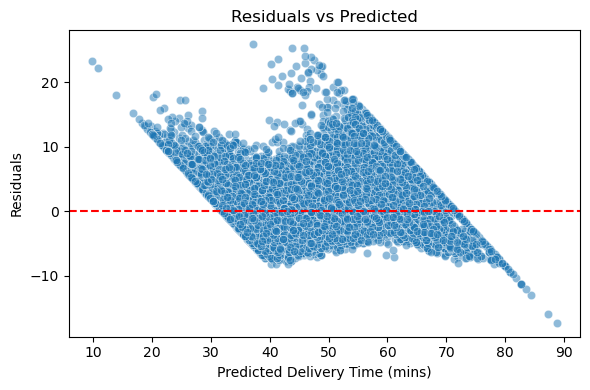

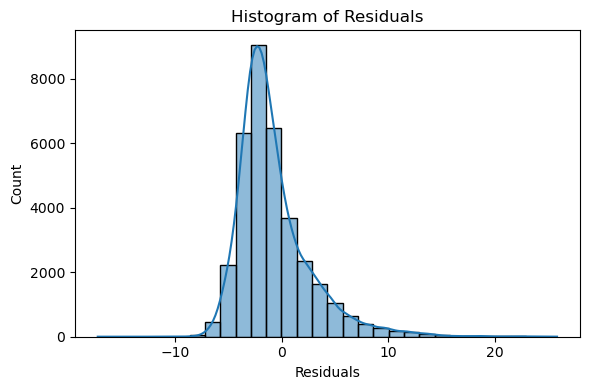

<Figure size 600x600 with 0 Axes>

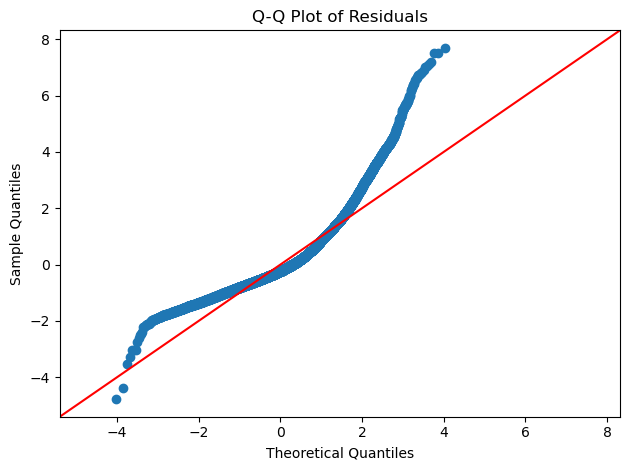

In [671]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

residual_of_y = y_test - y_final_pred
#Residuals of Y vs Predicted values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_final_pred, y=residual_of_y, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Delivery Time (mins)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.tight_layout()

# 2️ Histogram of residuals
plt.figure(figsize=(6, 4))
sns.histplot(residual_of_y, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.tight_layout()
plt.show()

# Q-Q plot
plt.figure(figsize=(6, 6))
sm.qqplot(residual_of_y, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model



Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

# Analyze the effect of a unit change in a feature, say 'total_items'

--- total_items | coef = -0.2448 | p-value = 0.003
--- The coefficient of -0.2448 means that, all else being equal, a 1-unit increase in total_items is associated with an average decrease of approximately 0.245 minutes in delivery time.

Since the p-value is 0.003 (< 0.05), this relationship is statistically significant.



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
Yes, order_protocol and isWeekend are categoieal variables in data.
order_protocol : Coefficient is small but significant it means the method of ordering has a small but measurable effect on delivery time. Orders placed with certain protocols may be slightly faster due to operational efficiencies.


isWeekend: The coefficient was positive,weekend orders might be take slightly longer to deliver. This could be due to higher demand, traffic conditions, or fewer dashers available.





---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
When you use test_size = 0.2 in train_test_split, it means: 20% of your data will be set aside for testing and
80% of your data will be used for training the model



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>Distance 0.46

---


##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>We can use the BotPlot or IQR-based statistical method to detect the outliers.
We chose to cap outliers rather than remove rows, because We wanted to retain as much data as possible. Capping reduces the influence of extreme values without losing valuable information.


---


##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>distance, total_outstanding_orders and total_onshift_dashers


---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>In simple terms, linear regression is a method of finding the best straight line fitting to the given data, i.e. finding the best linear relationship between the independent and dependent variables.
>In technical terms, linear regression is a machine learning algorithm that finds the best linear-fit relationship on any given data, between independent and dependent variables. It is mostly done by the Sum of Squared Residuals Method.
>Linear regression is a supervised learning algorithm used for predicting a continuous target variable by finding the best linear relationship between input features (X) and the target (Y).
>The goal is to find the best-fit straight line (or hyperplane in higher dimensions) that predicts Y from X.
Mathemetical representatio for one feature (simple linear regression): Y = b0 +b1x
 and for multiple features (multiple linear regression):Y = b0 +b1x1 +b2x2 +......+bnxn + err
>
>where Y = Target variable
      X, X1, X2, ...Xn = features
      b0 = intercept
      b1,b2,b3,..bn = coefficients (weights for each feature)
      err = error terms (residuals)


---


##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Simple linear regression models the relationship between one independent variable (X) and one dependent variable (Y).
equations = Y = b0 +b1x.
>Multiple linear regression models the relationship between two or more independent variables (X1, X2, ..., Xp) and one dependent variable (Y)
equations = Y = b0 +b1x1 +b2x2 +......+bnxn + err 


---


##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>The cost function in linear regression measures how far off predictions are from actual values by summing squared errors. The model minimizes this cost function using methods like Ordinary Least Squares to find the best coefficients that produce the smallest overall prediction error.


---


##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting means the model fits the training data too closely and fails on new data. Underfitting means the model is too simple and fails to capture important patterns, resulting in poor performance on both training and test data.

---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots help detect problems in a linear regression model by revealing non-linearity, non-constant error variance (heteroscedasticity), and patterns indicating the model may not fit well. Ideally, residuals should appear randomly scattered around zero without any clear pattern.